In [1]:
import pandas as pd
import glob, os   
pathFiles = r'data/Datasets_Healthy_Older_People/dataset'
all_files = glob.glob(os.path.join(pathFiles, "*"))
#df = pd.concat((pd.read_csv(f, header=0) for f in all_files), axis=0, ignore_index=True)
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header= None, names=['timeSec', 'accFrontal', 'accVertical', 'accLateral', 'antennaID', 'rssi', 'phase', 'frequency', 'activity'])
    li.append(df)
dataAll = pd.concat(li, axis=0, ignore_index=True)

In [6]:
dataAll.head(10)

,timeSec1,accFrontal,accVertical,accLateral,antennaID,rssi,phase,frequency,activity
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1
5,3.25,0.34238,0.96229,-0.059296,4,-56.5,1.2563,924.75,1
6,4.00,0.30721,0.99674,-0.070699,1,-63.5,3.8718,922.75,1
7,5.00,0.27203,0.99674,-0.093505,1,-64.0,2.4943,924.25,1
8,5.50,0.23685,1.03120,-0.127710,1,-64.5,2.0080,924.75,1
9,6.00,0.23685,1.03120,-0.127710,1,-66.0,1.1904,925.75,1


In [32]:
len(dataAll)

75128

In [4]:
import numpy as np
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)  
kmeans.fit(dataAll)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
print(np.round(kmeans.cluster_centers_,))

[[199.   1.   0.  -0.   2. -58.   3. 923.   2.]
 [665.   1.   0.  -1.   3. -58.   3. 922.   3.]]


In [16]:
from sklearn.metrics import silhouette_score
print(silhouette_score(dataAll, kmeans.labels_))

0.6118781883792763


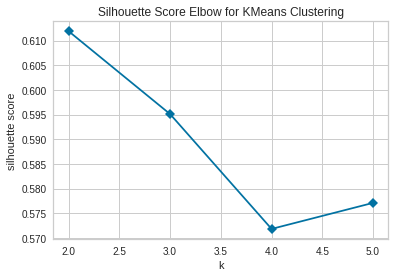

In [20]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
kmeans = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(dataAll)    
visualizer.poof()   

In [38]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
kmeans = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans, k=(5,12), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(dataAll)    
visualizer.poof()  

KeyboardInterrupt: 

In [43]:
import sklearn
dataAll1, dataAll2= sklearn.model_selection.train_test_split(dataAll, test_size=0.4, random_state=0)

In [44]:
print(len(dataAll1))
print(len(dataAll2))

45076
30052


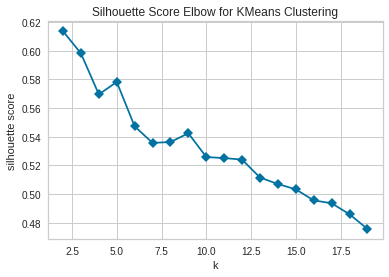

In [45]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
kmeans = KMeans(random_state=0)
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans, k=(2,20), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(dataAll2)    
visualizer.poof() 

In [46]:
#improvement one hot encoding
type(dataAll2)

pandas.core.frame.DataFrame

In [52]:
dataAll21 = dataAll2.drop(['antennaID','activity'], axis=1)
dataAll21

,timeSec,accFrontal,accVertical,accLateral,rssi,phase,frequency
8086,11.000,0.236850,0.996740,0.111750,-58.0,6.025500,923.75
16218,68.375,1.268700,-0.094162,-0.059296,-65.5,4.548300,925.25
56828,26.200,0.752770,0.801520,0.020525,-68.0,5.099000,922.25
33616,294.530,1.092800,-0.002297,-0.093505,-54.5,5.010000,922.75
24759,11.600,0.260300,0.962290,0.100350,-61.0,0.036816,924.75
17234,174.630,-0.032831,1.019700,0.020525,-57.0,1.530900,920.25
58283,232.330,0.295480,0.376650,-0.994340,-61.0,2.497300,920.75
45676,280.600,1.151400,0.020670,-0.116310,-55.0,5.793800,921.25
63981,84.000,0.342380,0.434060,-0.948730,-50.0,2.655300,921.25
49887,347.500,1.151400,0.181430,-0.093505,-61.5,3.492900,921.25


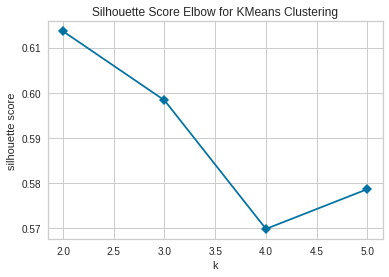

In [67]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
kmeans = KMeans(random_state=0)
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(dataAll21)    
visualizer.poof() 

In [55]:
#improvement with scaling
from sklearn import preprocessing
dataAll21Scaled = preprocessing.scale(dataAll21)

In [61]:
scaler = preprocessing.StandardScaler().fit(dataAll21)

In [64]:
dataAll21Scaled = scaler.transform(dataAll21)
dataAll21Scaled

array([[-1.10935411, -1.17844242,  1.54542884, ...,  0.05087858,
         1.31775831,  0.64542912],
       [-0.88787751,  1.37786118, -1.05561458, ..., -1.40531497,
         0.64069458,  1.53842361],
       [-1.0506797 ,  0.09969699,  1.07996476, ..., -1.89071283,
         0.89310387, -0.24756538],
       ...,
       [ 0.13361694,  1.37786118, -1.27465594, ..., -1.59947411,
         1.25377368,  0.94309395],
       [ 1.80506559, -1.14938253, -0.2616123 , ...,  1.99247   ,
         1.43518569, -1.43822471],
       [-0.0402832 ,  1.61024115, -1.00085663, ..., -1.01699669,
        -0.78310094,  0.94309395]])

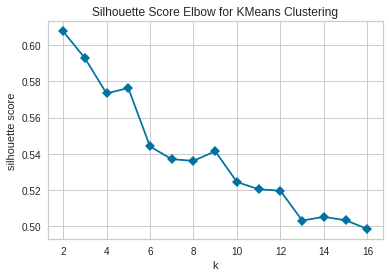

In [69]:
kmeans = KMeans(random_state=0)
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans, k=(2,17), metric='silhouette', timings=False)
visualizer.fit(dataAll1)    
visualizer.poof() 

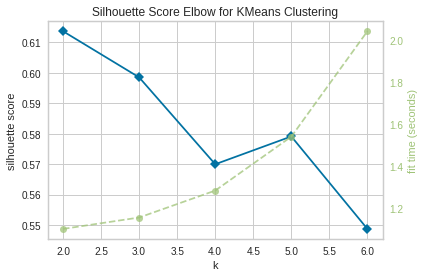

In [80]:
#clustering with 
dataAllPart = dataAll21.drop(['frequency'],axis=1)
kmeans = KMeans(random_state=120)
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans, k=(2,7), metric='silhouette')
visualizer.fit(dataAllPart)    
visualizer.poof() 

In [76]:
visualizer.fit(dataAllPart)    
visualizer.poof() 

In [155]:
# exploring the two classes
kmeans = KMeans(n_clusters=2)  
dataAll21Class = kmeans.fit(dataAllPart) 

In [82]:
dataAll21Class

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataAll21_scaled = scaler.fit_transform(dataAll21)
kmeans = KMeans(n_clusters=2)  
dataAll21Class = kmeans.fit(dataAll21_scaled) 
from sklearn.metrics import silhouette_score
print(silhouette_score(dataAll21_scaled, kmeans.labels_))

0.28521936273427756


In [182]:
dataAllPart = dataAll21.drop(['frequency'],axis=1)
dataAllPart.head(3)

,timeSec,accFrontal,accVertical,accLateral,rssi,phase,label
8086,11.000,0.23685,0.996740,0.111750,-58.0,6.0255,0
16218,68.375,1.26870,-0.094162,-0.059296,-65.5,4.5483,0
56828,26.200,0.75277,0.801520,0.020525,-68.0,5.0990,0


In [183]:
kmeans = KMeans(n_clusters=2, random_state=130)  
dataAll21Class = kmeans.fit(dataAllPart) 
from sklearn.metrics import silhouette_score
#print(silhouette_score(dataAll21, kmeans.labels_))

In [184]:
dataAll21Class

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=130, tol=0.0001, verbose=0)

In [185]:
col = ['b' if x == 0 else 'r' for x in dataAll21Class.labels_]

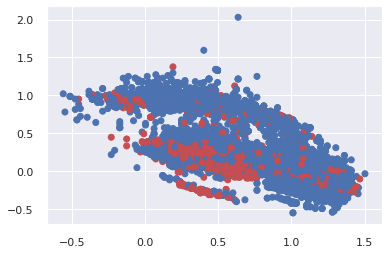

In [186]:
import matplotlib.pyplot as plt
plt.scatter(dataAll21.iloc[:,1], dataAll21.iloc[:,2], c=col, marker = 'o')

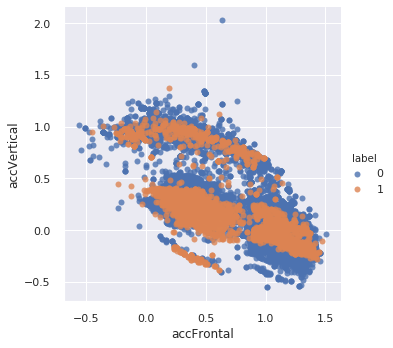

In [187]:
import seaborn as sns
import pandas as pd
from pylab import savefig
sns.set()
dataAll21['label'] = dataAll21Class.labels_.astype(str)
facet = sns.lmplot(data=dataAll21, x='accFrontal', y='accVertical', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

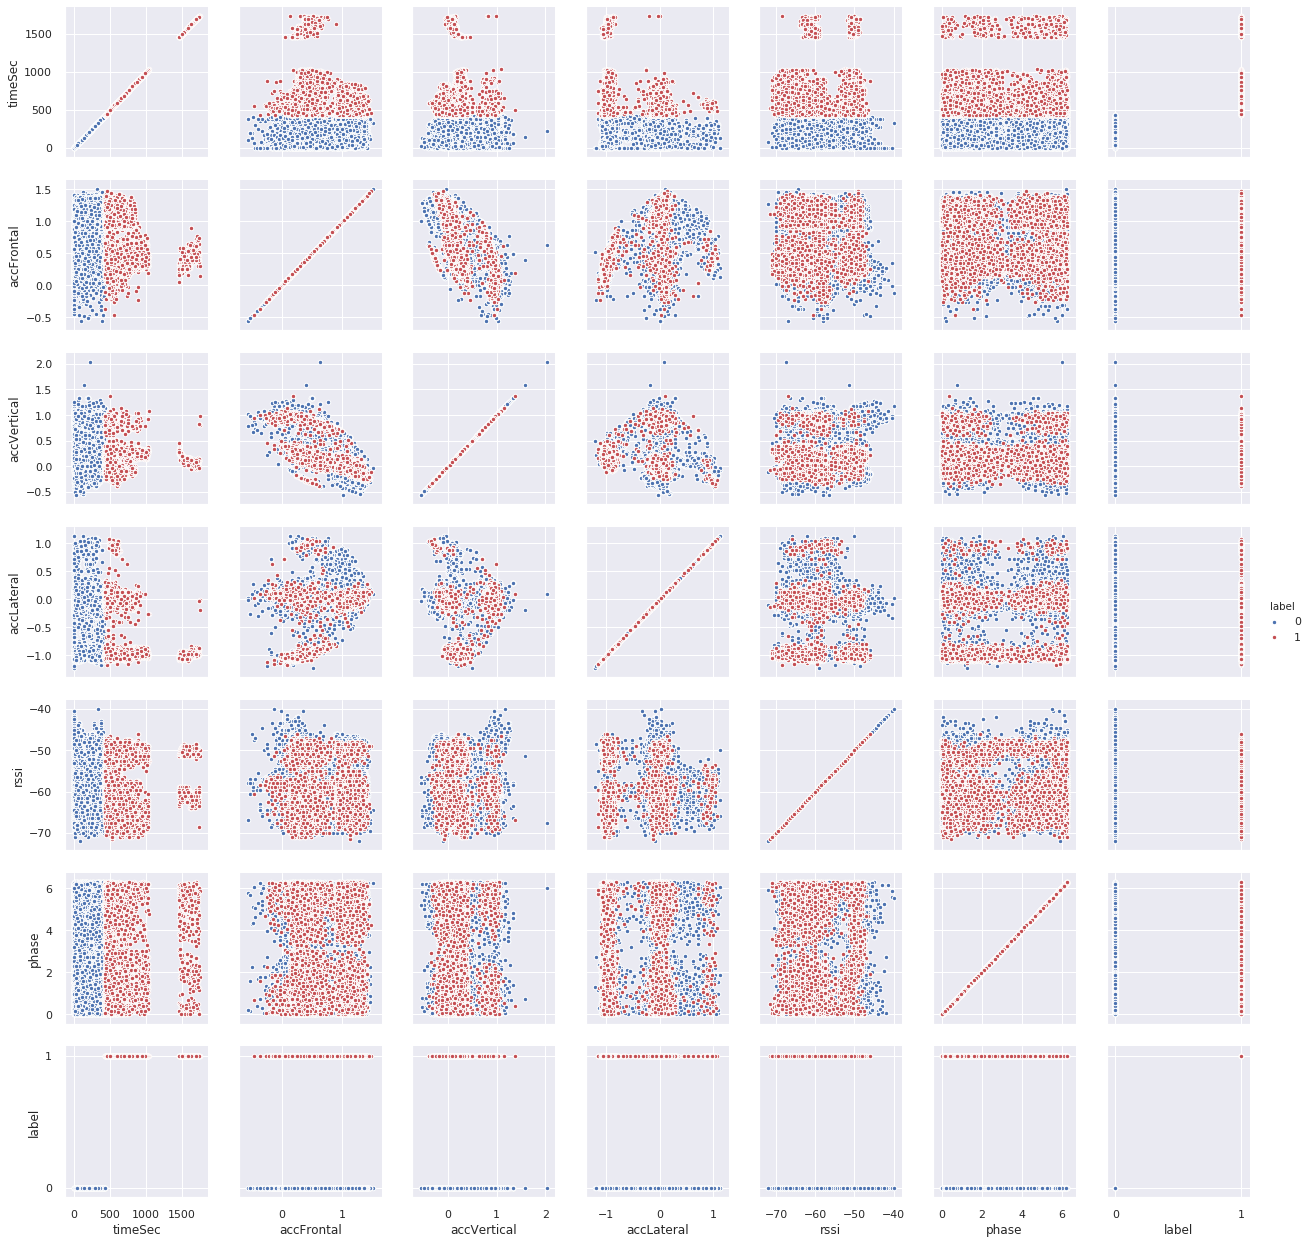

In [192]:
import seaborn as sns
import pandas as pd
from pylab import savefig
sns.set()
dataAllPart['label'] = dataAll21Class.labels_.astype(str)
g = sns.PairGrid(dataAllPart, hue="label", hue_order=["0", "1"],
                 palette=["b", "r"],
                 hue_kws={"s": [20, 20],
                          "marker": ["o", "o"]})
g.map(plt.scatter, linewidth=1, edgecolor="w")
g.add_legend()
plt.savefig('ex2.pdf')

The figure shows that for some features the data are linearly separable,and for others not
